## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [1]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [ ]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

You can perform any operations on this tensor as usual:

In [ ]:
y = x ** 2 + 2 * x + 1
print(y)

To compute the gradients of y with respect to x, you need to call backward() on y:

In [ ]:
y.backward()

In [ ]:
x.grad

In [2]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [3]:
import torch
import math

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Define the derivative of the sigmoid function (explicit formula)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Choose two points
point1 = torch.tensor(1.0, requires_grad=True)
point2 = torch.tensor(-2.0, requires_grad=True)

# Compute gradients using PyTorch automatic differentiation
sigmoid_output1 = sigmoid(point1)
sigmoid_output2 = sigmoid(point2)
sigmoid_output1.backward()
sigmoid_output2.backward()

# Extract gradients
gradient1_pytorch = point1.grad
gradient2_pytorch = point2.grad

# Compute gradients using explicit formula
gradient1_manual = sigmoid_derivative(point1)
gradient2_manual = sigmoid_derivative(point2)

# Print results
print("Gradient at point 1 (using PyTorch):", gradient1_pytorch.item())
print("Gradient at point 1 (using explicit formula):", gradient1_manual.item())
print("Gradient at point 2 (using PyTorch):", gradient2_pytorch.item())
print("Gradient at point 2 (using explicit formula):", gradient2_manual.item())


Gradient at point 1 (using PyTorch): 0.1966119408607483
Gradient at point 1 (using explicit formula): 0.1966119259595871
Gradient at point 2 (using PyTorch): 0.10499358177185059
Gradient at point 2 (using explicit formula): 0.10499358177185059


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [5]:
import torch

# Define the linear activation function
def linear_activation(x):
    return x

# Define the points at which we want to compute the gradient
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(-3.0, requires_grad=True)

# Compute the function values at x1 and x2
y1 = linear_activation(x1)
y2 = linear_activation(x2)

# Compute the gradients
gradient_at_x1 = torch.autograd.grad(y1, x1)[0].item()
gradient_at_x2 = torch.autograd.grad(y2, x2)[0].item()

# Known explicit formula for the gradient of f(x) = x is f'(x) = 1

# Compare the computed gradients with the known explicit formula
expected_gradient = 1.0

print("Gradient at x1:", gradient_at_x1)
print("Gradient at x2:", gradient_at_x2)
print("Expected gradient:", expected_gradient)



Gradient at x1: 1.0
Gradient at x2: 1.0
Expected gradient: 1.0


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [11]:
import torch

# Define the ReLU activation function
def relu(x):
    return torch.max(torch.tensor(0.0), x)

# Define the gradient of ReLU function
def relu_gradient(x):
    return torch.where(x > 0, torch.tensor(1.0), torch.tensor(0.0))

# Define the points for which gradients will be computed
points = [2.0, -1.5]

# Compute gradients using PyTorch
for point in points:
    x = torch.tensor(point, requires_grad=True)
    y = relu(x)
    y.backward()
    gradient = x.grad
    print(f"Point: {point}, Gradient (PyTorch): {gradient.item()}")

    # Compute gradients using the explicit formula
    explicit_gradient = relu_gradient(x)
    print(f"Point: {point}, Gradient (Explicit): {explicit_gradient.item()}")


Point: 2.0, Gradient (PyTorch): 1.0
Point: 2.0, Gradient (Explicit): 1.0
Point: -1.5, Gradient (PyTorch): 0.0
Point: -1.5, Gradient (Explicit): 0.0


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

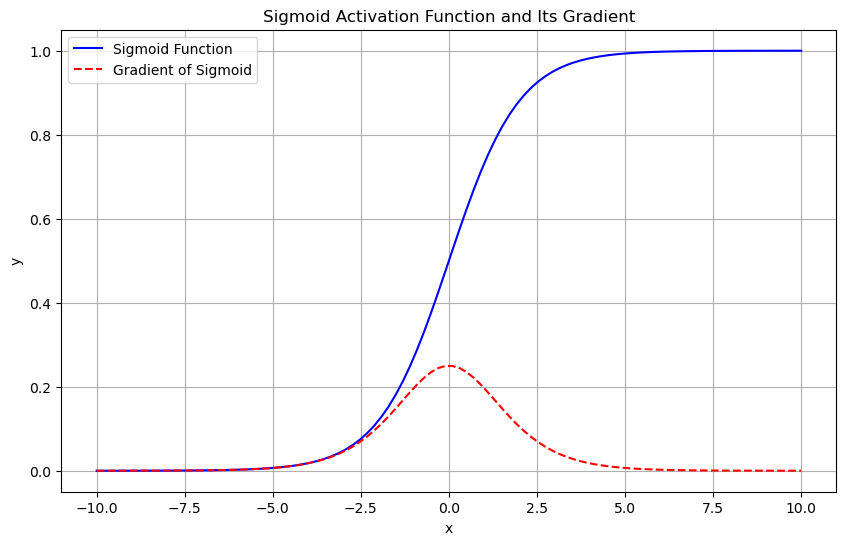

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Gradient of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Compute y values for sigmoid function and its gradient
y_sigmoid = sigmoid(x_values)
y_gradient = sigmoid_derivative(x_values)

# Plot sigmoid function and its gradient
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_sigmoid, label='Sigmoid Function', color='blue')
plt.plot(x_values, y_gradient, label='Gradient of Sigmoid', color='red', linestyle='--')
plt.title('Sigmoid Activation Function and Its Gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

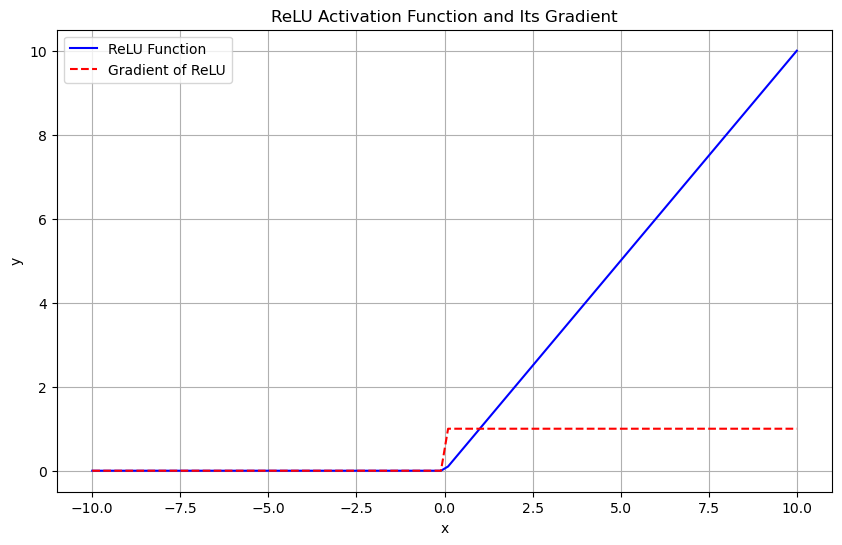

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Gradient of ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Compute y values for ReLU function and its gradient
y_relu = relu(x_values)
y_gradient = relu_derivative(x_values)

# Plot ReLU function and its gradient
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_relu, label='ReLU Function', color='blue')
plt.plot(x_values, y_gradient, label='Gradient of ReLU', color='red', linestyle='--')
plt.title('ReLU Activation Function and Its Gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

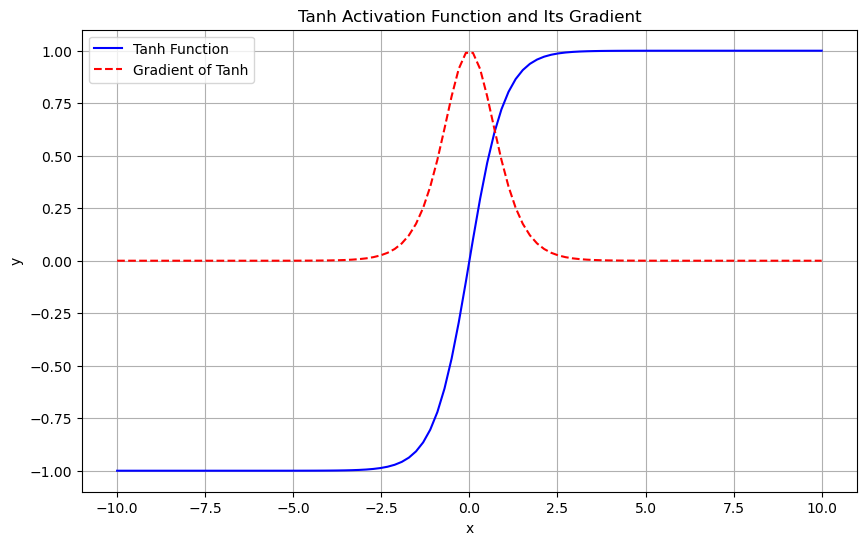

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Gradient of tanh function
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Compute y values for tanh function and its gradient
y_tanh = tanh(x_values)
y_gradient = tanh_derivative(x_values)

# Plot tanh function and its gradient
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_tanh, label='Tanh Function', color='blue')
plt.plot(x_values, y_gradient, label='Gradient of Tanh', color='red', linestyle='--')
plt.title('Tanh Activation Function and Its Gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

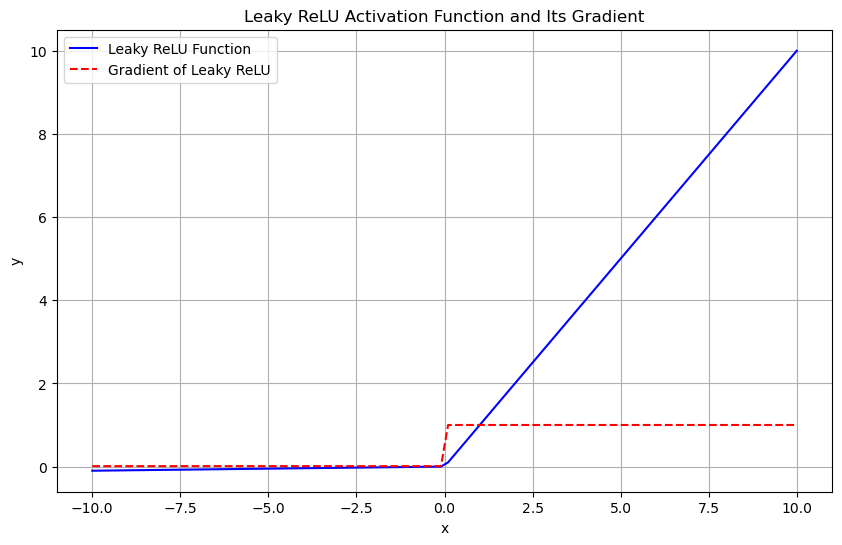

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Gradient of leaky ReLU function
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Generate x values
x_values = np.linspace(-10, 10, 100)

# Compute y values for leaky ReLU function and its gradient
y_leaky_relu = leaky_relu(x_values)
y_gradient = leaky_relu_derivative(x_values)

# Plot leaky ReLU function and its gradient
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_leaky_relu, label='Leaky ReLU Function', color='blue')
plt.plot(x_values, y_gradient, label='Gradient of Leaky ReLU', color='red', linestyle='--')
plt.title('Leaky ReLU Activation Function and Its Gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [ ]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [ ]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


In [ ]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the dataset for logic OR
X_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

# Define the Perceptron class
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(2, 1)  # Input size: 2, output size: 1
        
    def forward(self, x):
        return self.linear(x)

# Instantiate the Perceptron model
model = Perceptron()

# Define the binary cross-entropy loss function
criterion = nn.BCEWithLogitsLoss()

# Define the stochastic gradient descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the Perceptron model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    predicted = torch.round(torch.sigmoid(model(X_train)))
    accuracy = (predicted == y_train).sum().item() / y_train.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch [100/1000], Loss: 0.3658
Epoch [200/1000], Loss: 0.2816
Epoch [300/1000], Loss: 0.2273
Epoch [400/1000], Loss: 0.1896
Epoch [500/1000], Loss: 0.1621
Epoch [600/1000], Loss: 0.1412
Epoch [700/1000], Loss: 0.1248
Epoch [800/1000], Loss: 0.1116
Epoch [900/1000], Loss: 0.1008
Epoch [1000/1000], Loss: 0.0919
Accuracy: 100.00%
